## Imports and Setup

In [1]:
import os
import pandas as pd
import geopandas as gpd
import logging
import torch

import sys
sys.path.insert(0, "../utils/")
import model_utils
import config_utils
import embed_utils

%load_ext autoreload
%autoreload 2

## Data Configurations

In [12]:
cwd = os.path.dirname(os.getcwd())
config_file = os.path.join(cwd, "configs/model_configs/BIH-dinov2_vitl14-LR.yaml")
config = config_utils.load_config(config_file)

## Load Model

In [13]:
model = torch.hub.load("facebookresearch/dinov2", config["embed_model"])
model.name = config["embed_model"]
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
model.to(device)

Using cache found in /home/itingzon.unicef/.cache/torch/hub/facebookresearch_dinov2_main
INFO:dinov2:using MLP layer as FFN


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-23): 24 x NestedTensorBlock(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=1024, out_features=3072, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1024, out_features=1024, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )


## Load Data

In [14]:
data = model_utils.load_data(config, attributes=["rurban", "iso"], verbose=True)
data.head(3)

INFO:root:Reading file /home/itingzon.unicef/giga/data/vectors/train/BIH_train.geojson
INFO:root:
  rurban  iso       class  count  percentage
0  rural  BIH  non_school   2161    0.448154
1  rural  BIH      school    335    0.069473
2  urban  BIH  non_school   1943    0.402945
3  urban  BIH      school    383    0.079428
INFO:root:
                               count  percentage
rurban iso class      dataset                   
rural  BIH non_school test       435    0.451245
                      train     1726         NaN
           school     test        63    0.065353
                      train      272         NaN
urban  BIH non_school test       386    0.400415
                      train     1557         NaN
           school     test        79    0.081950
                      train      304         NaN
INFO:root:
                    count
dataset class            
test    non_school    821
        school        142
train   non_school   3283
        school        576
INFO:root

None


,UID,source,iso,country,region,subregion,name,giga_id_school,clean,validated,class,ghsl_smod,rurban,dataset,geometry
0,OVERTURE-BIH-SCHOOL-00000002,OVERTURE,BIH,Bosnia and Herzegovina,Europe,Southern Europe,"Osnovna škola ""Miladije"" Tuzla",None,0,0.0,school,30,urban,train,POINT (1513485.652 5288722.342)
1,OVERTURE-BIH-SCHOOL-00000006,OVERTURE,BIH,Bosnia and Herzegovina,Europe,Southern Europe,"Auto škola ""Peta Brzina"" Doboj",None,0,0.0,school,23,urban,train,POINT (1464942.219 5311288.399)
2,OVERTURE-BIH-SCHOOL-00000009,OVERTURE,BIH,Bosnia and Herzegovina,Europe,Southern Europe,Stem akademija Zenica,None,0,0.0,school,30,urban,train,POINT (1458621.894 5253227.890)


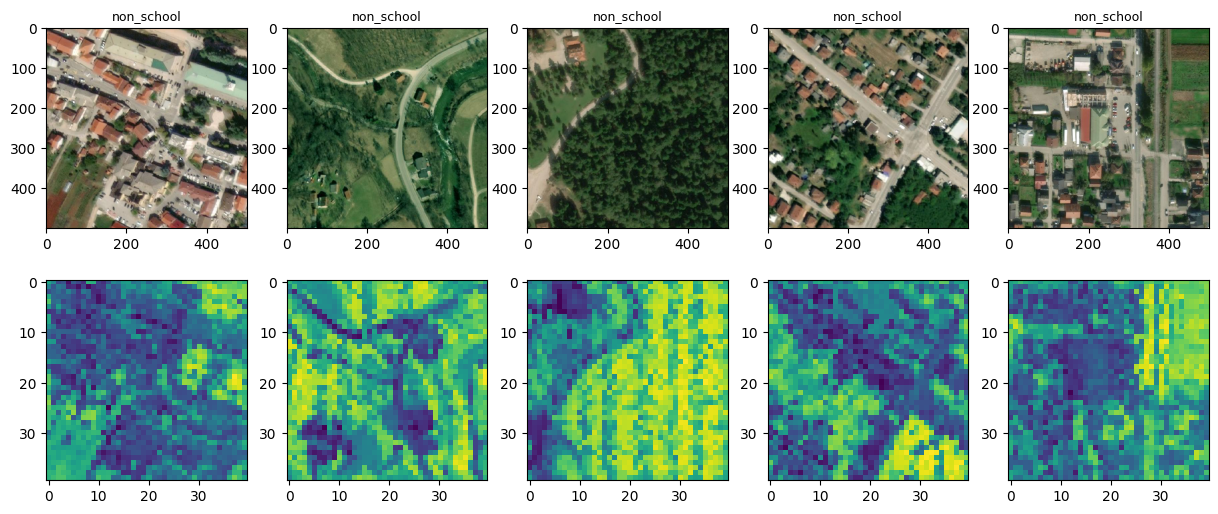

In [16]:
embed_utils.visualize_embeddings(config, data, model, batch_size=5)

In [7]:
embeddings = embed_utils.compute_embeddings(config, data, model)
embeddings.head(3)

100%|████████████████████| 10/10 [00:16<00:00,  1.60s/it]                                                               
INFO:root:Saved to /home/itingzon.unicef/giga/data/vectors/embeds/BWA_dinov2_vitl14_embeds.csv


,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,dataset,class
UID,,,,,,,,,,,,,,,,,,,,,
OVERTURE-BWA-SCHOOL-00000000,-1.871951,-0.130199,0.437924,1.774094,-1.686767,-2.145879,3.812310,-0.348690,0.394505,1.804772,...,0.431856,0.651756,-0.265848,4.252512,-3.046501,0.621545,-1.637016,0.353284,train,school
OVERTURE-BWA-SCHOOL-00000001,-0.685160,0.013508,0.333851,1.076913,-1.613161,-2.702847,3.429425,-0.346410,-0.115577,1.087029,...,-0.699847,1.255106,-0.725599,3.011922,-2.606266,0.554660,-1.906189,1.248020,train,school
OVERTURE-BWA-SCHOOL-00000003,-0.509637,-0.578562,1.087102,0.441891,-2.260241,-1.603556,4.390149,0.179291,-0.082017,1.484819,...,-0.752968,-0.471672,-0.520046,3.493338,-1.608122,0.742136,-1.854615,0.950206,train,school
